In [1]:
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import pandas as pd

In [ ]:
#NOTE: code is not written efficicently as it was highly explorative and investigative at the time of writing, also the image library is small

In [2]:
#change to data directory
os.chdir('./HDIP/')

In [185]:
#Load all image matrices 

f_Control = h5py.File('2.1 AB Gut and Head 15 micron P Zn Pb.h5')

Control_Head_Pb = f_Control['image 2']['2.1AB Head_Area_recon'][()][0,0,0,:,:]
Control_Head_P = f_Control['image 2']['2.1AB Head_Area_recon'][()][0,1,0,:,:]
Control_Head_Zn = f_Control['image 2']['2.1AB Head_Area_recon'][()][0,2,0,:,:]

Control_Gut_Pb = f_Control['image 1']['2.1B Gut_Area_recon'][()][0,0,0,:,:]
Control_Gut_P = f_Control['image 1']['2.1B Gut_Area_recon'][()][0,1,0,:,:]
Control_Gut_Zn = f_Control['image 1']['2.1B Gut_Area_recon'][()][0,2,0,:,:]

f_Mid_Head = h5py.File('1.1 AB Head15 micron P Zn Pb.h5')

Mid_Head_Pb = f_Mid_Head['image 1']['1.1 AB head Zn P Pb 15 micron_Area_recon'][()][0,0,0,:,:]
Mid_Head_P = f_Mid_Head['image 1']['1.1 AB head Zn P Pb 15 micron_Area_recon'][()][0,1,0,:,:]
Mid_Head_Zn = f_Mid_Head['image 1']['1.1 AB head Zn P Pb 15 micron_Area_recon'][()][0,2,0,:,:]

f_Mid_Gut = h5py.File('1.1 AB Gut 15 micron P Zn Pb v2.h5')

Mid_Gut_Pb = f_Mid_Gut['image 1']['1.1 AB Gut_Area_recon'][()][0,0,0,:,:]
Mid_Gut_P = f_Mid_Gut['image 1']['1.1 AB Gut_Area_recon'][()][0,1,0,:,:]
Mid_Gut_Zn = f_Mid_Gut['image 1']['1.1 AB Gut_Area_recon'][()][0,2,0,:,:]

f_High = h5py.File('3.2 and 4.2 AB Gut and Head 15 micron P Zn Pb second scan.h5') #High + CW

High_Head_Pb = f_High['image 1']['3.2 AB head P Zn Pb 15 micron redo_Area_recon'][()][0,0,0,:,:]
High_Head_P = f_High['image 1']['3.2 AB head P Zn Pb 15 micron redo_Area_recon'][()][0,1,0,:,:]
High_Head_Zn = f_High['image 1']['3.2 AB head P Zn Pb 15 micron redo_Area_recon'][()][0,2,0,:,:]

High_Gut_Pb = f_High['image 2']['3.2 AB gut P Zn Pb 15 micron redo_Area_recon'][()][0,0,0,:,:]
High_Gut_P = f_High['image 2']['3.2 AB gut P Zn Pb 15 micron redo_Area_recon'][()][0,1,0,:,:]
High_Gut_Zn = f_High['image 2']['3.2 AB gut P Zn Pb 15 micron redo_Area_recon'][()][0,2,0,:,:]

CW_Head_Pb = f_High['image 3']['4.2 AB head P Zn Pb 15 micron redo_Area_recon'][()][0,0,0,:,:]
CW_Head_P = f_High['image 3']['4.2 AB head P Zn Pb 15 micron redo_Area_recon'][()][0,1,0,:,:]
CW_Head_Zn = f_High['image 3']['4.2 AB head P Zn Pb 15 micron redo_Area_recon'][()][0,2,0,:,:]

CW_Gut_Pb = f_High['image 4']['4.2 AB gut P Zn Pb 15 micron redo_Area_recon'][()][0,0,0,:,:]
CW_Gut_P = f_High['image 4']['4.2 AB gut P Zn Pb 15 micron redo_Area_recon'][()][0,1,0,:,:]
CW_Gut_Zn = f_High['image 4']['4.2 AB gut P Zn Pb 15 micron redo_Area_recon'][()][0,2,0,:,:]


In [4]:
#HEAD - image pixel counts for normalisation
shapes_h = [Control_Head_Pb.shape, Mid_Head_Pb.shape, High_Head_Pb.shape, CW_Head_Pb.shape]
pixels_h = list()
for i in shapes_h:
    pixels_h.append(i[0]*i[1])

pixels_h = np.array(pixels_h)
tissue_pixels_h  = np.array([18553, 21484, 17986, 19537])

In [5]:
#GUT - image pixel counts for normalisation
shapes = [Control_Gut_Pb.shape, Mid_Gut_Pb.shape, High_Gut_Pb.shape, CW_Gut_Pb.shape]
pixels = list()
for i in shapes:
    pixels.append(i[0]*i[1])

pixels = np.array(pixels)
tissue_pixels_g = np.array([37429, 28227, 36121, 23524])

In [48]:
#total elemental abundance comparative matrix column names
head_col_n = ["Control_Head", "1000_Head", "2500_Head", "CW_Stream_Head"]
gut_col_n = ["Control_Gut", "1000_Gut", "2500_Gut", "CW_Stream_Gut"]

In [95]:
#No normalisation raw count total elemental abundance (208Pb) calculation
Head_Pb = list([Control_Head_Pb, Mid_Head_Pb, High_Head_Pb, CW_Head_Pb])
all_sum = list()
for i in Head_Pb:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
pb = all_sum[:, np.newaxis]/all_sum
pb

print(np.array_str(pb, precision=2, suppress_small=True))

[[1.   0.64 0.39 0.7 ]
 [1.57 1.   0.6  1.1 ]
 [2.6  1.65 1.   1.82]
 [1.42 0.91 0.55 1.  ]]


In [96]:
#display total elemental abundance results in a table
Head_Pb_DF = pd.DataFrame(pb, index=head_col_n, columns = head_col_n)
Head_Pb_DF.round(3)

,Control_Head,1000_Head,2500_Head,CW_Stream_Head
Control_Head,1.000,0.638,0.385,0.702
1000_Head,1.568,1.000,0.604,1.101
2500_Head,2.595,1.655,1.000,1.822
CW_Stream_Head,1.425,0.908,0.549,1.000


In [97]:
#divide total elemental abundance (208Pb) by the number of pixels on the image - normalisation
Head_Pb = list([Control_Head_Pb, Mid_Head_Pb, High_Head_Pb, CW_Head_Pb])
all_sum = list()
for i in Head_Pb:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/pixels_h
pb = all_sum[:, np.newaxis]/all_sum
pb 

print(np.array_str(pb, precision=2, suppress_small=True))

[[1.   0.72 0.36 0.72]
 [1.4  1.   0.5  1.01]
 [2.8  2.01 1.   2.03]
 [1.38 0.99 0.49 1.  ]]


In [98]:
#display total elemental abundance results in a table
Head_Pb_DF = pd.DataFrame(pb, index=head_col_n, columns = head_col_n)
Head_Pb_DF.round(3)

,Control_Head,1000_Head,2500_Head,CW_Stream_Head
Control_Head,1.000,0.717,0.357,0.723
1000_Head,1.395,1.000,0.498,1.009
2500_Head,2.804,2.009,1.000,2.027
CW_Stream_Head,1.383,0.991,0.493,1.000


In [99]:
#divide total elemental abundance (208Pb) by the number of pixels that produced a signal during LA-ICP-MS
#image clustering was previously performed with KMeans and DBSCAN,
#but was not necessary as only the tissue section was ablated to produce significant signal, not its surroundings
Head_Pb = list([Control_Head_Pb, Mid_Head_Pb, High_Head_Pb, CW_Head_Pb])
all_sum = list()
for i in Head_Pb:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_h
pb = all_sum[:, np.newaxis]/all_sum
pb 

print(np.array_str(pb, precision=2, suppress_small=True))

[[1.   0.74 0.37 0.74]
 [1.35 1.   0.51 1.  ]
 [2.68 1.98 1.   1.98]
 [1.35 1.   0.51 1.  ]]


In [100]:
#display total elemental abundance results in a table
Head_Pb_DF = pd.DataFrame(pb, index=head_col_n, columns = head_col_n)
Head_Pb_DF.round(3)

,Control_Head,1000_Head,2500_Head,CW_Stream_Head
Control_Head,1.000,0.738,0.374,0.739
1000_Head,1.354,1.000,0.506,1.001
2500_Head,2.677,1.977,1.000,1.979
CW_Stream_Head,1.353,0.999,0.505,1.000


In [192]:
#tissue norm + 95th percentile filter
#the 95th percentile of the image signal values (cps) was calculated and set as the maximum value threshold to which all the higher values were equated to
#this was performed to make an elemental abundance comparison whilst excluding potentially artifactual spots of extremely high brightness

Control_Head_Pb_95 = np.percentile(Control_Head_Pb, 95)
Mid_Head_Pb_95 = np.percentile(Mid_Head_Pb, 95)
High_Head_Pb_95 = np.percentile(High_Head_Pb, 95)
CW_Head_Pb_95 = np.percentile(CW_Head_Pb, 95)

Control_Head_Pb_95_arr = pd.DataFrame(Control_Head_Pb.copy())
Mid_Head_Pb_95_arr = pd.DataFrame(Mid_Head_Pb.copy())
High_Head_Pb_95_arr = pd.DataFrame(High_Head_Pb.copy())
CW_Head_Pb_95_arr = pd.DataFrame(CW_Head_Pb.copy())

Control_Head_Pb_95_arr[Control_Head_Pb_95_arr >= Control_Head_Pb_95] = Control_Head_Pb_95
Mid_Head_Pb_95_arr[Mid_Head_Pb_95_arr >= Mid_Head_Pb_95] = Mid_Head_Pb_95
High_Head_Pb_95_arr[High_Head_Pb_95_arr >= High_Head_Pb_95] = High_Head_Pb_95
CW_Head_Pb_95_arr[CW_Head_Pb_95_arr >= CW_Head_Pb_95] = CW_Head_Pb_95

Control_Head_Pb_95_arr = Control_Head_Pb_95_arr.to_numpy()
Mid_Head_Pb_95_arr = Mid_Head_Pb_95_arr.to_numpy()
High_Head_Pb_95_arr = High_Head_Pb_95_arr.to_numpy()
CW_Head_Pb_95_arr = CW_Head_Pb_95_arr.to_numpy()

Head_Pb = list([Control_Head_Pb_95_arr, Mid_Head_Pb_95_arr, High_Head_Pb_95_arr, CW_Head_Pb_95_arr])

all_sum = list()
for i in Head_Pb:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_h
pb = all_sum[:, np.newaxis]/all_sum
pb 

print(np.array_str(pb, precision=2, suppress_small=True))

[[1.   0.72 0.39 0.72]
 [1.38 1.   0.54 1.  ]
 [2.56 1.85 1.   1.85]
 [1.39 1.   0.54 1.  ]]


In [193]:
#plot the 95th percentile thresholded comparison
Head_Pb_DF = pd.DataFrame(pb, index=head_col_n, columns = head_col_n)
Head_Pb_DF.round(3)

,Control_Head,1000_Head,2500_Head,CW_Stream_Head
Control_Head,1.000,0.722,0.390,0.721
1000_Head,1.384,1.000,0.541,0.999
2500_Head,2.561,1.850,1.000,1.847
CW_Stream_Head,1.386,1.001,0.541,1.000


In [ ]:
#below are the comparative matrices for the rest of the elements/tissues

In [133]:
Head_P = list([Control_Head_P, Mid_Head_P, High_Head_P, CW_Head_P])
all_sum = list()
for i in Head_P:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_h
p = all_sum[:, np.newaxis]/all_sum
p

print(np.array_str(p, precision=2, suppress_small=True))

[[1.   0.94 0.88 0.76]
 [1.06 1.   0.93 0.81]
 [1.14 1.07 1.   0.87]
 [1.31 1.24 1.15 1.  ]]


In [134]:
Head_P_DF = pd.DataFrame(p, index=head_col_n, columns = head_col_n)
Head_P_DF.round(3)

,Control_Head,1000_Head,2500_Head,CW_Stream_Head
Control_Head,1.000,0.941,0.876,0.761
1000_Head,1.063,1.000,0.931,0.809
2500_Head,1.142,1.075,1.000,0.869
CW_Stream_Head,1.314,1.237,1.151,1.000


In [198]:
#95
Control_Head_P_95 = np.percentile(Control_Head_P, 95)
Mid_Head_P_95 = np.percentile(Mid_Head_P, 95)
High_Head_P_95 = np.percentile(High_Head_P, 95)
CW_Head_P_95 = np.percentile(CW_Head_P, 95)

Control_Head_P_95_arr = pd.DataFrame(Control_Head_P.copy())
Mid_Head_P_95_arr = pd.DataFrame(Mid_Head_P.copy())
High_Head_P_95_arr = pd.DataFrame(High_Head_P.copy())
CW_Head_P_95_arr = pd.DataFrame(CW_Head_P.copy())

Control_Head_P_95_arr[Control_Head_P_95_arr >= Control_Head_P_95] = Control_Head_P_95
Mid_Head_P_95_arr[Mid_Head_P_95_arr >= Mid_Head_P_95] = Mid_Head_P_95
High_Head_P_95_arr[High_Head_P_95_arr >= High_Head_P_95] = High_Head_P_95
CW_Head_P_95_arr[CW_Head_P_95_arr >= CW_Head_P_95] = CW_Head_P_95

Control_Head_P_95_arr = Control_Head_P_95_arr.to_numpy()
Mid_Head_P_95_arr = Mid_Head_P_95_arr.to_numpy()
High_Head_P_95_arr = High_Head_P_95_arr.to_numpy()
CW_Head_P_95_arr = CW_Head_P_95_arr.to_numpy()

Head_P = list([Control_Head_P_95_arr, Mid_Head_P_95_arr, High_Head_P_95_arr, CW_Head_P_95_arr])

all_sum = list()
for i in Head_P:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_h
p = all_sum[:, np.newaxis]/all_sum
p

print(np.array_str(p, precision=2, suppress_small=True))

[[1.   0.93 0.85 0.74]
 [1.08 1.   0.92 0.8 ]
 [1.17 1.09 1.   0.87]
 [1.35 1.26 1.15 1.  ]]


In [199]:
Head_P_DF = pd.DataFrame(p, index=head_col_n, columns = head_col_n)
Head_P_DF.round(3)

,Control_Head,1000_Head,2500_Head,CW_Stream_Head
Control_Head,1.000,0.928,0.852,0.739
1000_Head,1.078,1.000,0.918,0.797
2500_Head,1.174,1.089,1.000,0.867
CW_Stream_Head,1.353,1.255,1.153,1.000


In [137]:
Head_Zn = list([Control_Head_Zn, Mid_Head_Zn, High_Head_Zn, CW_Head_Zn])
all_sum = list()
for i in Head_Zn:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_h
zn = all_sum[:, np.newaxis]/all_sum
zn

print(np.array_str(zn, precision=2, suppress_small=True))

[[1.   0.96 0.92 1.28]
 [1.05 1.   0.96 1.34]
 [1.08 1.04 1.   1.39]
 [0.78 0.75 0.72 1.  ]]


In [138]:
Head_Zn_DF = pd.DataFrame(zn, index=head_col_n, columns = head_col_n)
Head_Zn_DF.round(3)

,Control_Head,1000_Head,2500_Head,CW_Stream_Head
Control_Head,1.000,0.957,0.923,1.280
1000_Head,1.045,1.000,0.965,1.338
2500_Head,1.083,1.037,1.000,1.387
CW_Stream_Head,0.781,0.747,0.721,1.000


In [200]:
#95
Control_Head_Zn_95 = np.percentile(Control_Head_Zn, 95)
Mid_Head_Zn_95 = np.percentile(Mid_Head_Zn, 95)
High_Head_Zn_95 = np.percentile(High_Head_Zn, 95)
CW_Head_Zn_95 = np.percentile(CW_Head_Zn, 95)

Control_Head_Zn_95_arr = pd.DataFrame(Control_Head_Zn.copy())
Mid_Head_Zn_95_arr = pd.DataFrame(Mid_Head_Zn.copy())
High_Head_Zn_95_arr = pd.DataFrame(High_Head_Zn.copy())
CW_Head_Zn_95_arr = pd.DataFrame(CW_Head_Zn.copy())

Control_Head_Zn_95_arr[Control_Head_Zn_95_arr >= Control_Head_Zn_95] = Control_Head_Zn_95
Mid_Head_Zn_95_arr[Mid_Head_Zn_95_arr >= Mid_Head_Zn_95] = Mid_Head_Zn_95
High_Head_Zn_95_arr[High_Head_Zn_95_arr >= High_Head_Zn_95] = High_Head_Zn_95
CW_Head_Zn_95_arr[CW_Head_Zn_95_arr >= CW_Head_Zn_95] = CW_Head_Zn_95

Control_Head_Zn_95_arr = Control_Head_Zn_95_arr.to_numpy()
Mid_Head_Zn_95_arr = Mid_Head_Zn_95_arr.to_numpy()
High_Head_Zn_95_arr = High_Head_Zn_95_arr.to_numpy()
CW_Head_Zn_95_arr = CW_Head_Zn_95_arr.to_numpy()

Head_Zn = list([Control_Head_Zn_95_arr, Mid_Head_Zn_95_arr, High_Head_Zn_95_arr, CW_Head_Zn_95_arr])

all_sum = list()
for i in Head_Zn:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_h
zn = all_sum[:, np.newaxis]/all_sum
zn

print(np.array_str(zn, precision=2, suppress_small=True))

[[1.   0.97 0.91 1.26]
 [1.03 1.   0.94 1.3 ]
 [1.1  1.06 1.   1.38]
 [0.8  0.77 0.72 1.  ]]


In [201]:
Head_Zn_DF = pd.DataFrame(zn, index=head_col_n, columns = head_col_n)
Head_Zn_DF.round(3)

,Control_Head,1000_Head,2500_Head,CW_Stream_Head
Control_Head,1.000,0.967,0.908,1.257
1000_Head,1.034,1.000,0.940,1.301
2500_Head,1.101,1.064,1.000,1.384
CW_Stream_Head,0.795,0.769,0.722,1.000


In [143]:
Gut_Zn = list([Control_Gut_Zn, Mid_Gut_Zn, High_Gut_Zn, CW_Gut_Zn])
all_sum = list()
for i in Gut_Zn:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_g
zn_g = all_sum[:, np.newaxis]/all_sum
zn_g

print(np.array_str(zn_g, precision=2, suppress_small=True))

[[1.   1.03 0.96 0.18]
 [0.98 1.   0.94 0.18]
 [1.04 1.07 1.   0.19]
 [5.54 5.68 5.32 1.  ]]


In [144]:
Gut_Zn_DF = pd.DataFrame(zn_g, index=gut_col_n, columns = gut_col_n)
Gut_Zn_DF.round(3)

,Control_Gut,1000_Gut,2500_Gut,CW_Stream_Gut
Control_Gut,1.000,1.025,0.960,0.181
1000_Gut,0.975,1.000,0.936,0.176
2500_Gut,1.041,1.068,1.000,0.188
CW_Stream_Gut,5.536,5.676,5.316,1.000


In [202]:
#95
Control_Gut_Zn_95 = np.percentile(Control_Gut_Zn, 95)
Mid_Gut_Zn_95 = np.percentile(Mid_Gut_Zn, 95)
High_Gut_Zn_95 = np.percentile(High_Gut_Zn, 95)
CW_Gut_Zn_95 = np.percentile(CW_Gut_Zn, 95)

Control_Gut_Zn_95_arr = pd.DataFrame(Control_Gut_Zn.copy())
Mid_Gut_Zn_95_arr = pd.DataFrame(Mid_Gut_Zn.copy())
High_Gut_Zn_95_arr = pd.DataFrame(High_Gut_Zn.copy())
CW_Gut_Zn_95_arr = pd.DataFrame(CW_Gut_Zn.copy())

Control_Gut_Zn_95_arr[Control_Gut_Zn_95_arr >= Control_Gut_Zn_95] = Control_Gut_Zn_95
Mid_Gut_Zn_95_arr[Mid_Gut_Zn_95_arr >= Mid_Gut_Zn_95] = Mid_Gut_Zn_95
High_Gut_Zn_95_arr[High_Gut_Zn_95_arr >= High_Gut_Zn_95] = High_Gut_Zn_95
CW_Gut_Zn_95_arr[CW_Gut_Zn_95_arr >= CW_Gut_Zn_95] = CW_Gut_Zn_95

Control_Gut_Zn_95_arr = Control_Gut_Zn_95_arr.to_numpy()
Mid_Gut_Zn_95_arr = Mid_Gut_Zn_95_arr.to_numpy()
High_Gut_Zn_95_arr = High_Gut_Zn_95_arr.to_numpy()
CW_Gut_Zn_95_arr = CW_Gut_Zn_95_arr.to_numpy()

Gut_Zn = list([Control_Gut_Zn_95_arr, Mid_Gut_Zn_95_arr, High_Gut_Zn_95_arr, CW_Gut_Zn_95_arr])

all_sum = list()
for i in Gut_Zn:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_g
zn_g = all_sum[:, np.newaxis]/all_sum
zn_g

print(np.array_str(zn_g, precision=2, suppress_small=True))

[[1.   0.94 1.   0.23]
 [1.07 1.   1.06 0.24]
 [1.   0.94 1.   0.23]
 [4.36 4.08 4.35 1.  ]]


In [203]:
Gut_Zn_DF = pd.DataFrame(zn_g, index=gut_col_n, columns = gut_col_n)
Gut_Zn_DF.round(3)

,Control_Gut,1000_Gut,2500_Gut,CW_Stream_Gut
Control_Gut,1.000,0.936,0.997,0.229
1000_Gut,1.068,1.000,1.064,0.245
2500_Gut,1.003,0.940,1.000,0.230
CW_Stream_Gut,4.360,4.083,4.345,1.000


In [147]:
Gut_P = list([Control_Gut_P, Mid_Gut_P, High_Gut_P, CW_Gut_P])
all_sum = list()
for i in Gut_P:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_g
p_g = all_sum[:, np.newaxis]/all_sum
p_g

print(np.array_str(p_g, precision=2, suppress_small=True))

[[1.   0.85 1.05 0.55]
 [1.17 1.   1.23 0.65]
 [0.96 0.82 1.   0.53]
 [1.81 1.55 1.9  1.  ]]


In [148]:
Gut_P_DF = pd.DataFrame(p_g, index=gut_col_n, columns = gut_col_n)
Gut_P_DF.round(3)

,Control_Gut,1000_Gut,2500_Gut,CW_Stream_Gut
Control_Gut,1.000,0.854,1.047,0.552
1000_Gut,1.172,1.000,1.227,0.647
2500_Gut,0.955,0.815,1.000,0.527
CW_Stream_Gut,1.811,1.546,1.896,1.000


In [204]:
#95
Control_Gut_P_95 = np.percentile(Control_Gut_P, 95)
Mid_Gut_P_95 = np.percentile(Mid_Gut_P, 95)
High_Gut_P_95 = np.percentile(High_Gut_P, 95)
CW_Gut_P_95 = np.percentile(CW_Gut_P, 95)

Control_Gut_P_95_arr = pd.DataFrame(Control_Gut_P.copy())
Mid_Gut_P_95_arr = pd.DataFrame(Mid_Gut_P.copy())
High_Gut_P_95_arr = pd.DataFrame(High_Gut_P.copy())
CW_Gut_P_95_arr = pd.DataFrame(CW_Gut_P.copy())

Control_Gut_P_95_arr[Control_Gut_P_95_arr >= Control_Gut_P_95] = Control_Gut_P_95
Mid_Gut_P_95_arr[Mid_Gut_P_95_arr >= Mid_Gut_P_95] = Mid_Gut_P_95
High_Gut_P_95_arr[High_Gut_P_95_arr >= High_Gut_P_95] = High_Gut_P_95
CW_Gut_P_95_arr[CW_Gut_P_95_arr >= CW_Gut_P_95] = CW_Gut_P_95

Control_Gut_P_95_arr = Control_Gut_P_95_arr.to_numpy()
Mid_Gut_P_95_arr = Mid_Gut_P_95_arr.to_numpy()
High_Gut_P_95_arr = High_Gut_P_95_arr.to_numpy()
CW_Gut_P_95_arr = CW_Gut_P_95_arr.to_numpy()

Gut_P = list([Control_Gut_P_95_arr, Mid_Gut_P_95_arr, High_Gut_P_95_arr, CW_Gut_P_95_arr])

all_sum = list()
for i in Gut_P:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_g
p_g = all_sum[:, np.newaxis]/all_sum
p_g

print(np.array_str(p_g, precision=2, suppress_small=True))

[[1.   0.81 1.02 0.54]
 [1.23 1.   1.25 0.66]
 [0.98 0.8  1.   0.53]
 [1.86 1.51 1.89 1.  ]]


In [205]:
Gut_P_DF = pd.DataFrame(p_g, index=gut_col_n, columns = gut_col_n)
Gut_P_DF.round(3)

,Control_Gut,1000_Gut,2500_Gut,CW_Stream_Gut
Control_Gut,1.000,0.814,1.019,0.539
1000_Gut,1.229,1.000,1.252,0.662
2500_Gut,0.981,0.798,1.000,0.529
CW_Stream_Gut,1.855,1.510,1.891,1.000


In [151]:
Gut_Pb = list([Control_Gut_Pb, Mid_Gut_Pb, High_Gut_Pb, CW_Gut_Pb])
all_sum = list()
for i in Gut_Pb:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_g
pb_g = all_sum[:, np.newaxis]/all_sum
pb_g

print(np.array_str(pb_g, precision=2, suppress_small=True))

[[  1.     0.13   0.03   0.  ]
 [  7.53   1.     0.21   0.02]
 [ 35.83   4.76   1.     0.08]
 [423.72  56.24  11.83   1.  ]]


In [152]:
Gut_Pb_DF = pd.DataFrame(pb_g, index=gut_col_n, columns = gut_col_n)
Gut_Pb_DF.round(3)

,Control_Gut,1000_Gut,2500_Gut,CW_Stream_Gut
Control_Gut,1.000,0.133,0.028,0.002
1000_Gut,7.535,1.000,0.210,0.018
2500_Gut,35.830,4.755,1.000,0.085
CW_Stream_Gut,423.725,56.236,11.826,1.000


In [206]:
#95
Control_Gut_Pb_95 = np.percentile(Control_Gut_Pb, 95)
Mid_Gut_Pb_95 = np.percentile(Mid_Gut_Pb, 95)
High_Gut_Pb_95 = np.percentile(High_Gut_Pb, 95)
CW_Gut_Pb_95 = np.percentile(CW_Gut_Pb, 95)

Control_Gut_Pb_95_arr = pd.DataFrame(Control_Gut_Pb.copy())
Mid_Gut_Pb_95_arr = pd.DataFrame(Mid_Gut_Pb.copy())
High_Gut_Pb_95_arr = pd.DataFrame(High_Gut_Pb.copy())
CW_Gut_Pb_95_arr = pd.DataFrame(CW_Gut_Pb.copy())

Control_Gut_Pb_95_arr[Control_Gut_Pb_95_arr >= Control_Gut_Pb_95] = Control_Gut_Pb_95
Mid_Gut_Pb_95_arr[Mid_Gut_Pb_95_arr >= Mid_Gut_Pb_95] = Mid_Gut_Pb_95
High_Gut_Pb_95_arr[High_Gut_Pb_95_arr >= High_Gut_Pb_95] = High_Gut_Pb_95
CW_Gut_Pb_95_arr[CW_Gut_Pb_95_arr >= CW_Gut_Pb_95] = CW_Gut_Pb_95

Control_Gut_Pb_95_arr = Control_Gut_Pb_95_arr.to_numpy()
Mid_Gut_Pb_95_arr = Mid_Gut_Pb_95_arr.to_numpy()
High_Gut_Pb_95_arr = High_Gut_Pb_95_arr.to_numpy()
CW_Gut_Pb_95_arr = CW_Gut_Pb_95_arr.to_numpy()

Gut_Pb = list([Control_Gut_Pb_95_arr, Mid_Gut_Pb_95_arr, High_Gut_Pb_95_arr, CW_Gut_Pb_95_arr])

all_sum = list()
for i in Gut_Pb:
    cps_sum = i.sum()
    all_sum.append(cps_sum)

all_sum = np.array(all_sum)
all_sum = all_sum/tissue_pixels_g
pb_g = all_sum[:, np.newaxis]/all_sum
pb_g

print(np.array_str(pb_g, precision=2, suppress_small=True))

[[ 1.    0.19  0.13  0.01]
 [ 5.13  1.    0.65  0.06]
 [ 7.84  1.53  1.    0.09]
 [84.24 16.41 10.74  1.  ]]


In [207]:
Gut_Pb_DF = pd.DataFrame(pb_g, index=gut_col_n, columns = gut_col_n)
Gut_Pb_DF.round(3)

,Control_Gut,1000_Gut,2500_Gut,CW_Stream_Gut
Control_Gut,1.000,0.195,0.128,0.012
1000_Gut,5.135,1.000,0.655,0.061
2500_Gut,7.843,1.527,1.000,0.093
CW_Stream_Gut,84.243,16.406,10.742,1.000


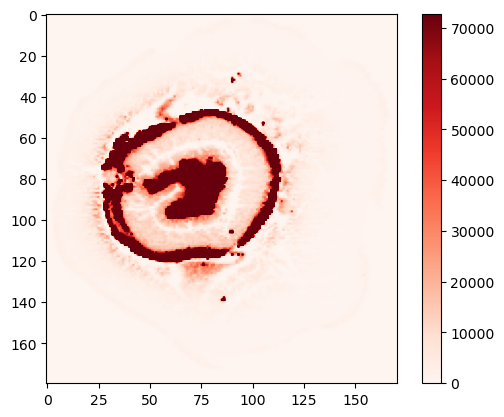

In [24]:
#plotting attempt of the matrix, emplying a percentile threshold 
plt.figure()

plt.imshow(CW_Gut_Pb, cmap='Reds', vmax = np.percentile(CW_Gut_Pb,94.4))
plt.colorbar()
plt.show()

.....................................................................................................

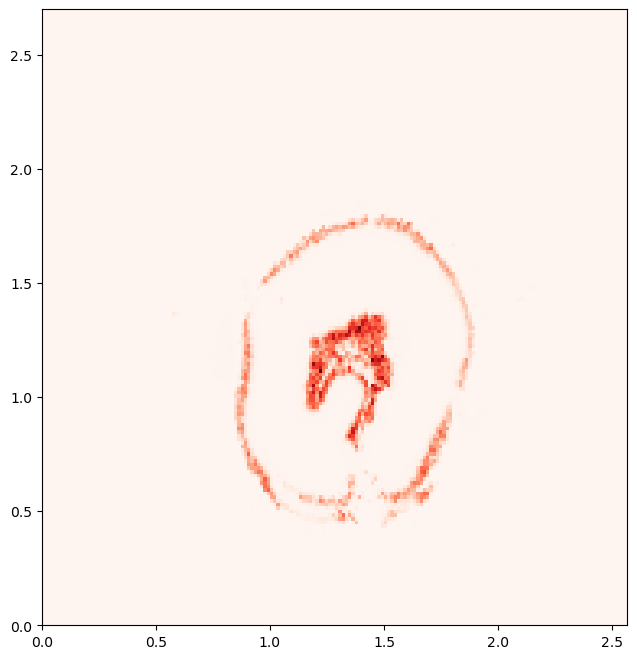

In [82]:
#creating an animation of the threshold descent applied to the Cwmystwyth gut 208Pb metallomic map
#the metallomic map contained extreme levels of lead in the chloragogenous tissue which the animation helps to visualise in respect to other tissues
fps = 1
nSeconds = 99
snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

        container = plt.imshow(sample, cmap='Reds', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", vmax = np.percentile(CW_Gut_Pb, 100-i))
    return [container]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1 / fps, # in ms
                               )

anim.save(filename="./pillow_example.gif", writer="pillow")



In [ ]:
#Plotting metallomic maps using flat and log scales

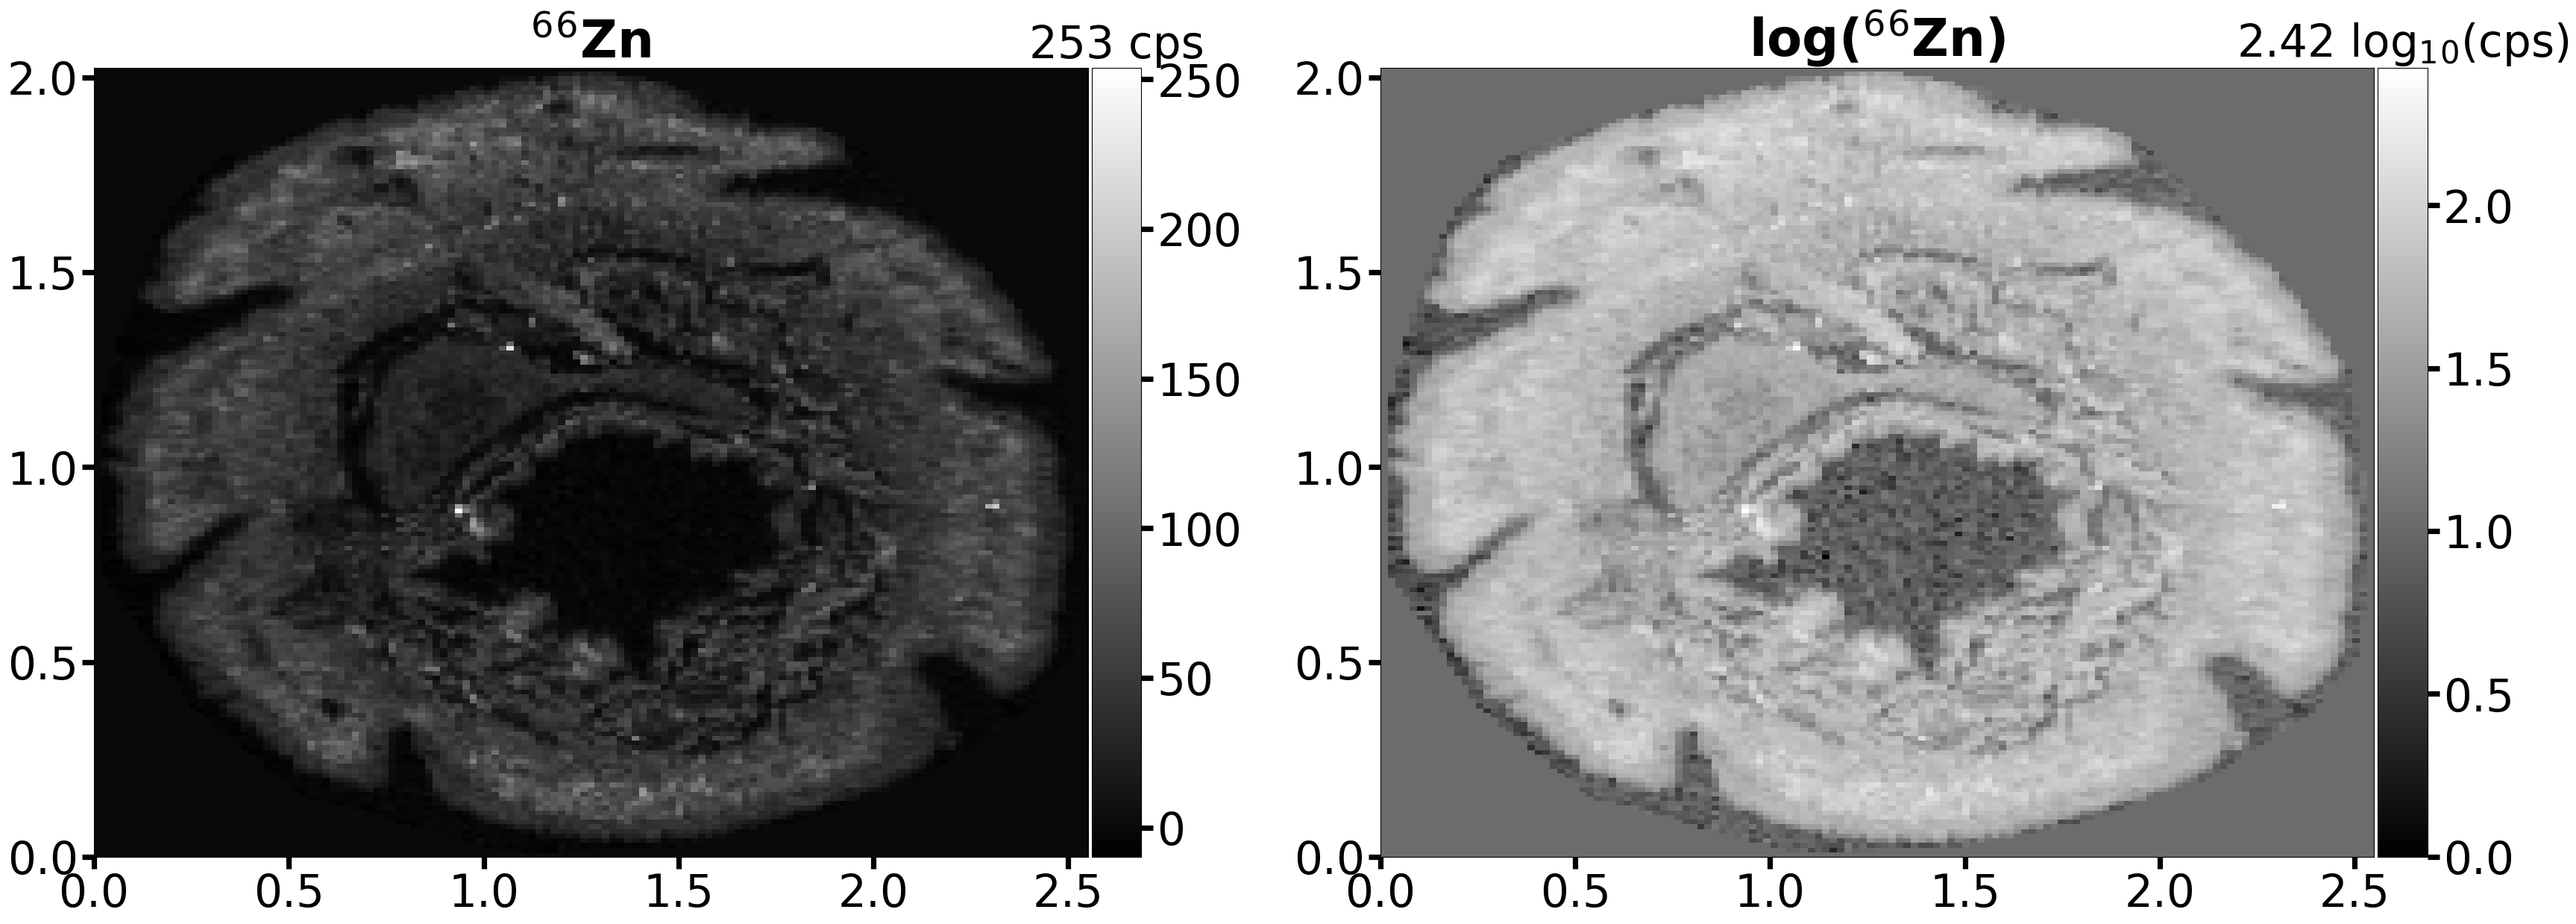

In [32]:
from numpy import inf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator

# Control_Head_Pb, Control_Head_P, Control_Head_Zn, Control_Gut_Pb, Control_Gut_P, Control_Gut_Zn, Mid_Head_Pb, Mid_Head_P, Mid_Head_Zn
# Mid_Gut_Pb, Mid_Gut_P, Mid_Gut_Zn, High_Head_Pb, High_Head_P, High_Head_Zn, High_Gut_Pb, High_Gut_P, High_Gut_Zn, CW_Head_Pb,
# CW_Head_P, CW_Head_Zn, CW_Gut_Pb, CW_Gut_P, CW_Gut_Zn

data = High_Head_Zn
k_num=1
save_name="./HighHead66Zn3535"

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(35,35))

sample = np.rot90(data,k=k_num,)
#sample = np.flip(data.transpose())

im1 = ax1.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", vmax = np.percentile(data,100))

divider3 = make_axes_locatable(ax1)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar2 = plt.colorbar(im1, cax=cax3, format="%.0f", label="")
cbar2.ax.set_title(f"{int(np.percentile(sample,100))} cps", fontsize=43)
cbar2.ax.tick_params(labelsize=43, length=11.7, width=5.2)


# fmt = '%1.0f'
# clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="cps",)
# clb.ax.set_title(int(np.percentile(CW_Gut_Pb,95)), fontsize=10)
ax1.set_title("$^{6}$$^{6}$Zn", fontweight="bold", size=49.5)
ax1.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

sample = data

if sample.min() < 0:
    sample = sample + abs(sample.min())
    sample = sample + 1

sample = np.log10(np.rot90(sample, k=k_num,))

sample[sample == -inf] = 0

im2 = ax2.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", )

divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar3 = plt.colorbar(im2, cax=cax3, format="%.1f", label="",)

cbar3.ax.set_title(f"{sample.max():.2f} log$_{1}$$_{0}$(cps)", fontsize=43,) 
cbar3.ax.tick_params(labelsize=43, length=11.7, width=5.2)

ax2.set_title("log($^{6}$$^{6}$Zn)", fontweight="bold", size=49.5)
ax2.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

#fmt = '%1.0f'
#clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="log$_{10}$(cps)")
fig.tight_layout(pad=5, w_pad=5, h_pad=5.0)
plt.show()
fig.savefig(save_name, bbox_inches ="tight", pad_inches = 1, transparent = True)

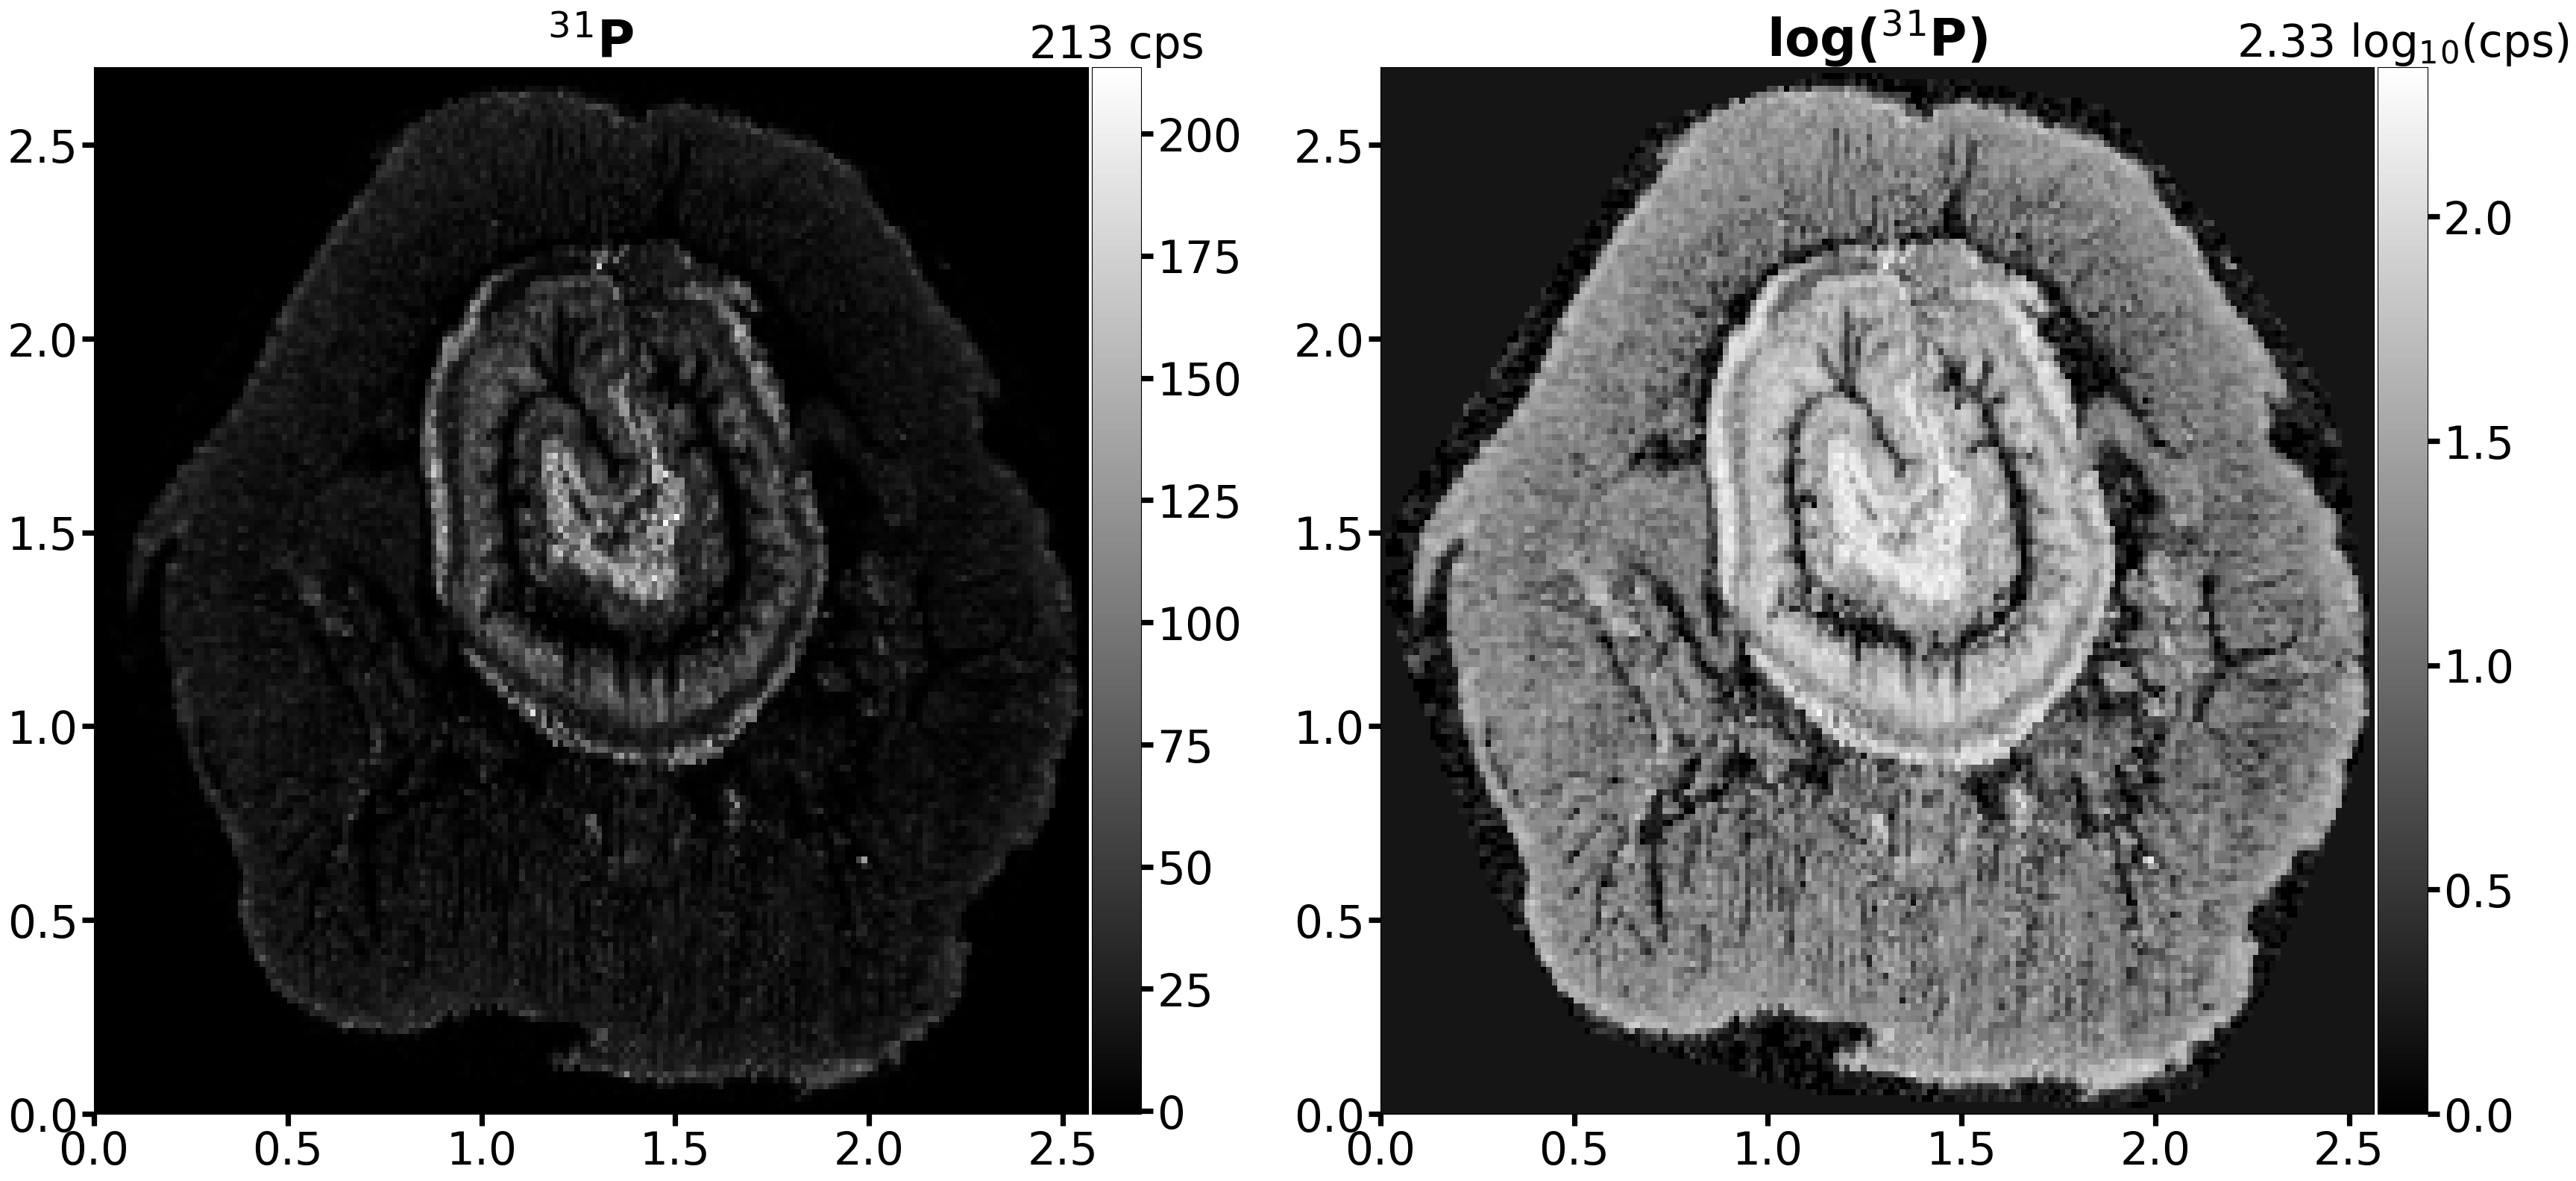

In [429]:
from numpy import inf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator

# Control_Head_Pb, Control_Head_P, Control_Head_Zn, Control_Gut_Pb, Control_Gut_P, Control_Gut_Zn, Mid_Head_Pb, Mid_Head_P, Mid_Head_Zn
# Mid_Gut_Pb, Mid_Gut_P, Mid_Gut_Zn, High_Head_Pb, High_Head_P, High_Head_Zn, High_Gut_Pb, High_Gut_P, High_Gut_Zn, CW_Head_Pb,
# CW_Head_P, CW_Head_Zn, CW_Gut_Pb, CW_Gut_P, CW_Gut_Zn

data = CW_Gut_P
k_num=3
save_name="./CWGut31P3535"

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(35,35))

sample = np.rot90(data,k=k_num,)
#sample = np.flip(data.transpose())

im1 = ax1.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", vmax = np.percentile(data,100))

divider3 = make_axes_locatable(ax1)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar2 = plt.colorbar(im1, cax=cax3, format="%.0f", label="")
cbar2.ax.set_title(f"{int(np.percentile(sample,100))} cps", fontsize=43)
cbar2.ax.tick_params(labelsize=43, length=11.7, width=5.2)


# fmt = '%1.0f'
# clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="cps",)
# clb.ax.set_title(int(np.percentile(CW_Gut_Pb,95)), fontsize=10)
ax1.set_title("$^{3}$$^{1}$P", fontweight="bold", size=49.5)
ax1.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

sample = data

if sample.min() < 0:
    sample = sample + abs(sample.min())
    sample = sample + 1

sample = np.log10(np.rot90(sample, k=k_num,))

sample[sample == -inf] = 0

im2 = ax2.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", )

divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar3 = plt.colorbar(im2, cax=cax3, format="%.1f", label="",)

cbar3.ax.set_title(f"{sample.max():.2f} log$_{1}$$_{0}$(cps)", fontsize=43,) 
cbar3.ax.tick_params(labelsize=43, width=5.2, length=11.7)

ax2.set_title("log($^{3}$$^{1}$P)", fontweight="bold", size=49.5)
ax2.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

#fmt = '%1.0f'
#clb = plt.colorbar(fraction=0.05, Zpad=0.01, format = fmt, label="log$_{10}$(cps)")
fig.tight_layout(pad=5, w_pad=5, h_pad=5.0)
plt.show()
fig.savefig(save_name, bbox_inches ="tight", pad_inches = 1, transparent = True)

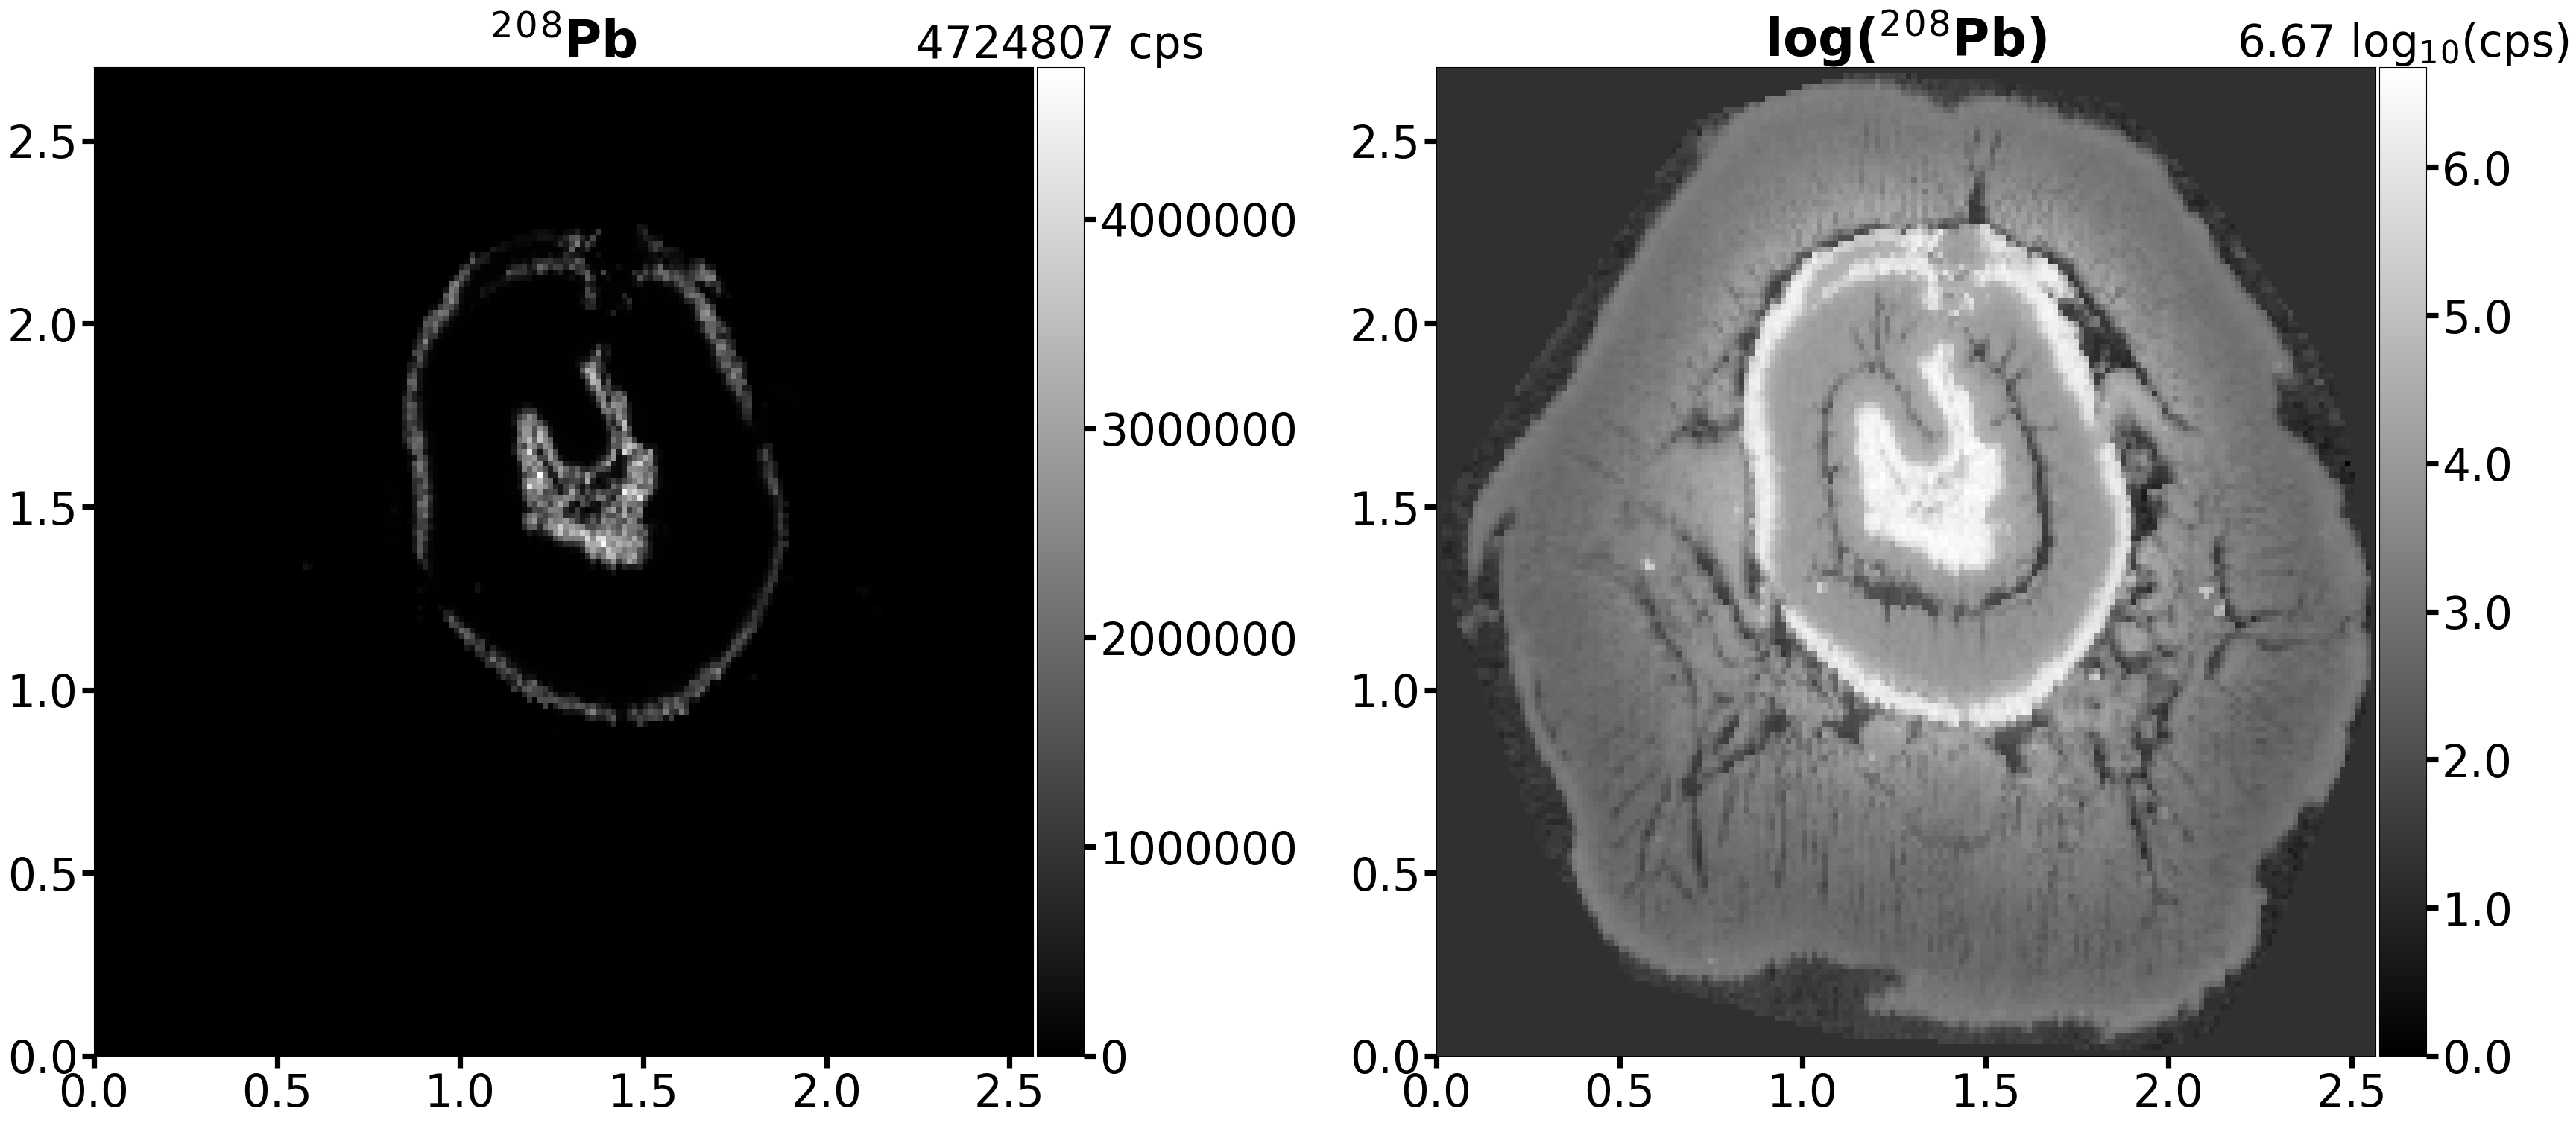

In [430]:
from numpy import inf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator

# Control_Head_Pb, Control_Head_P, Control_Head_Zn, Control_Gut_Pb, Control_Gut_P, Control_Gut_Zn, Mid_Head_Pb, Mid_Head_P, Mid_Head_Zn
# Mid_Gut_Pb, Mid_Gut_P, Mid_Gut_Zn, High_Head_Pb, High_Head_P, High_Head_Zn, High_Gut_Pb, High_Gut_P, High_Gut_Zn, CW_Head_Pb,
# CW_Head_P, CW_Head_Zn, CW_Gut_Pb, CW_Gut_P, CW_Gut_Zn

data = CW_Gut_Pb
k_num=3
save_name="./CWGut208Pb3535"

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(35,35))

sample = np.rot90(data,k=k_num,)
#sample = np.flip(data.transpose())

im1 = ax1.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", vmax = np.percentile(data,100))

divider3 = make_axes_locatable(ax1)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar2 = plt.colorbar(im1, cax=cax3, format="%.0f", label="")
cbar2.ax.set_title(f"{int(np.percentile(sample,100))} cps", fontsize=43)
cbar2.ax.tick_params(labelsize=43, width=5.2, length=11.7)


# fmt = '%1.0f'
# clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="cps",)
# clb.ax.set_title(int(np.percentile(CW_Gut_Pb,95)), fontsize=10)
ax1.set_title("$^{2}$$^{0}$$^{8}$Pb", fontweight="bold", size=49.5)
ax1.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

sample = data

if sample.min() < 0:
    sample = sample + abs(sample.min())
    sample = sample + 1

sample = np.log10(np.rot90(sample, k=k_num,))

sample[sample == -inf] = 0

im2 = ax2.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", )

divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar3 = plt.colorbar(im2, cax=cax3, format="%.1f", label="",)

cbar3.ax.set_title(f"{sample.max():.2f} log$_{1}$$_{0}$(cps)", fontsize=43,) 
cbar3.ax.tick_params(labelsize=43, width=5.2, length=11.7)

ax2.set_title("log($^{2}$$^{0}$$^{8}$Pb)", fontweight="bold", size=49.5)
ax2.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

#fmt = '%1.0f'
#clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="log$_{10}$(cps)")
fig.tight_layout(pad=5, w_pad=5, h_pad=5.0)
plt.show()
fig.savefig(save_name, bbox_inches ="tight", pad_inches = 1, transparent = True)

In [38]:
f_S_CA = h5py.File('4.2 AB Gut and Head 15 micron S and Ca.h5')

CW_Head_S = f_S_CA['image 2']['4.2 AB Head S Ca 15 micron_Area_recon'][()][0,1,0,:,:]
CW_Gut_S = f_S_CA['image 1']['4.2 AB Gut S Ca 15 micron_Area_recon'][()][0,1,0,:,:]

CW_Head_Ca = f_S_CA['image 2']['4.2 AB Head S Ca 15 micron_Area_recon'][()][0,2,0,:,:]
CW_Gut_Ca = f_S_CA['image 1']['4.2 AB Gut S Ca 15 micron_Area_recon'][()][0,2,0,:,:]

f_High_Head_4 = h5py.File('3.2 and 4.2 AB Head 4 micron Pb.h5')
CW_Head_4micron_Pb = f_High_Head_4['image 1']['4.2AB Head Pb 4 micron_Area_recon'][()][0,1,0,:,:]

f_Mid_Head_4 = h5py.File('1.1 AB Head 4 micron Pb.h5')
Mid_Head_4micron_Pb = f_Mid_Head_4['image 1']['1.1 AB head 4 micron res_Area_recon'][()][0,1,0,:,:]

f_High_Head_4 = h5py.File('3.2 and 4.2 AB Head 4 micron Pb.h5')
High_Head_4micron_Pb = f_High_Head_4['image 2']['3.2 AB head Pb 4 micron_Area_recon'][()][0,0,0,:,:]

In [436]:
f_S_CA = h5py.File('4.2 AB Gut and Head 15 micron S and Ca.h5')
f_High_Head_4 = h5py.File('3.2 and 4.2 AB Head 4 micron Pb.h5')
f_Mid_Head_4 = h5py.File('1.1 AB Head 4 micron Pb.h5')
f_High_Head_4 = h5py.File('3.2 and 4.2 AB Head 4 micron Pb.h5')

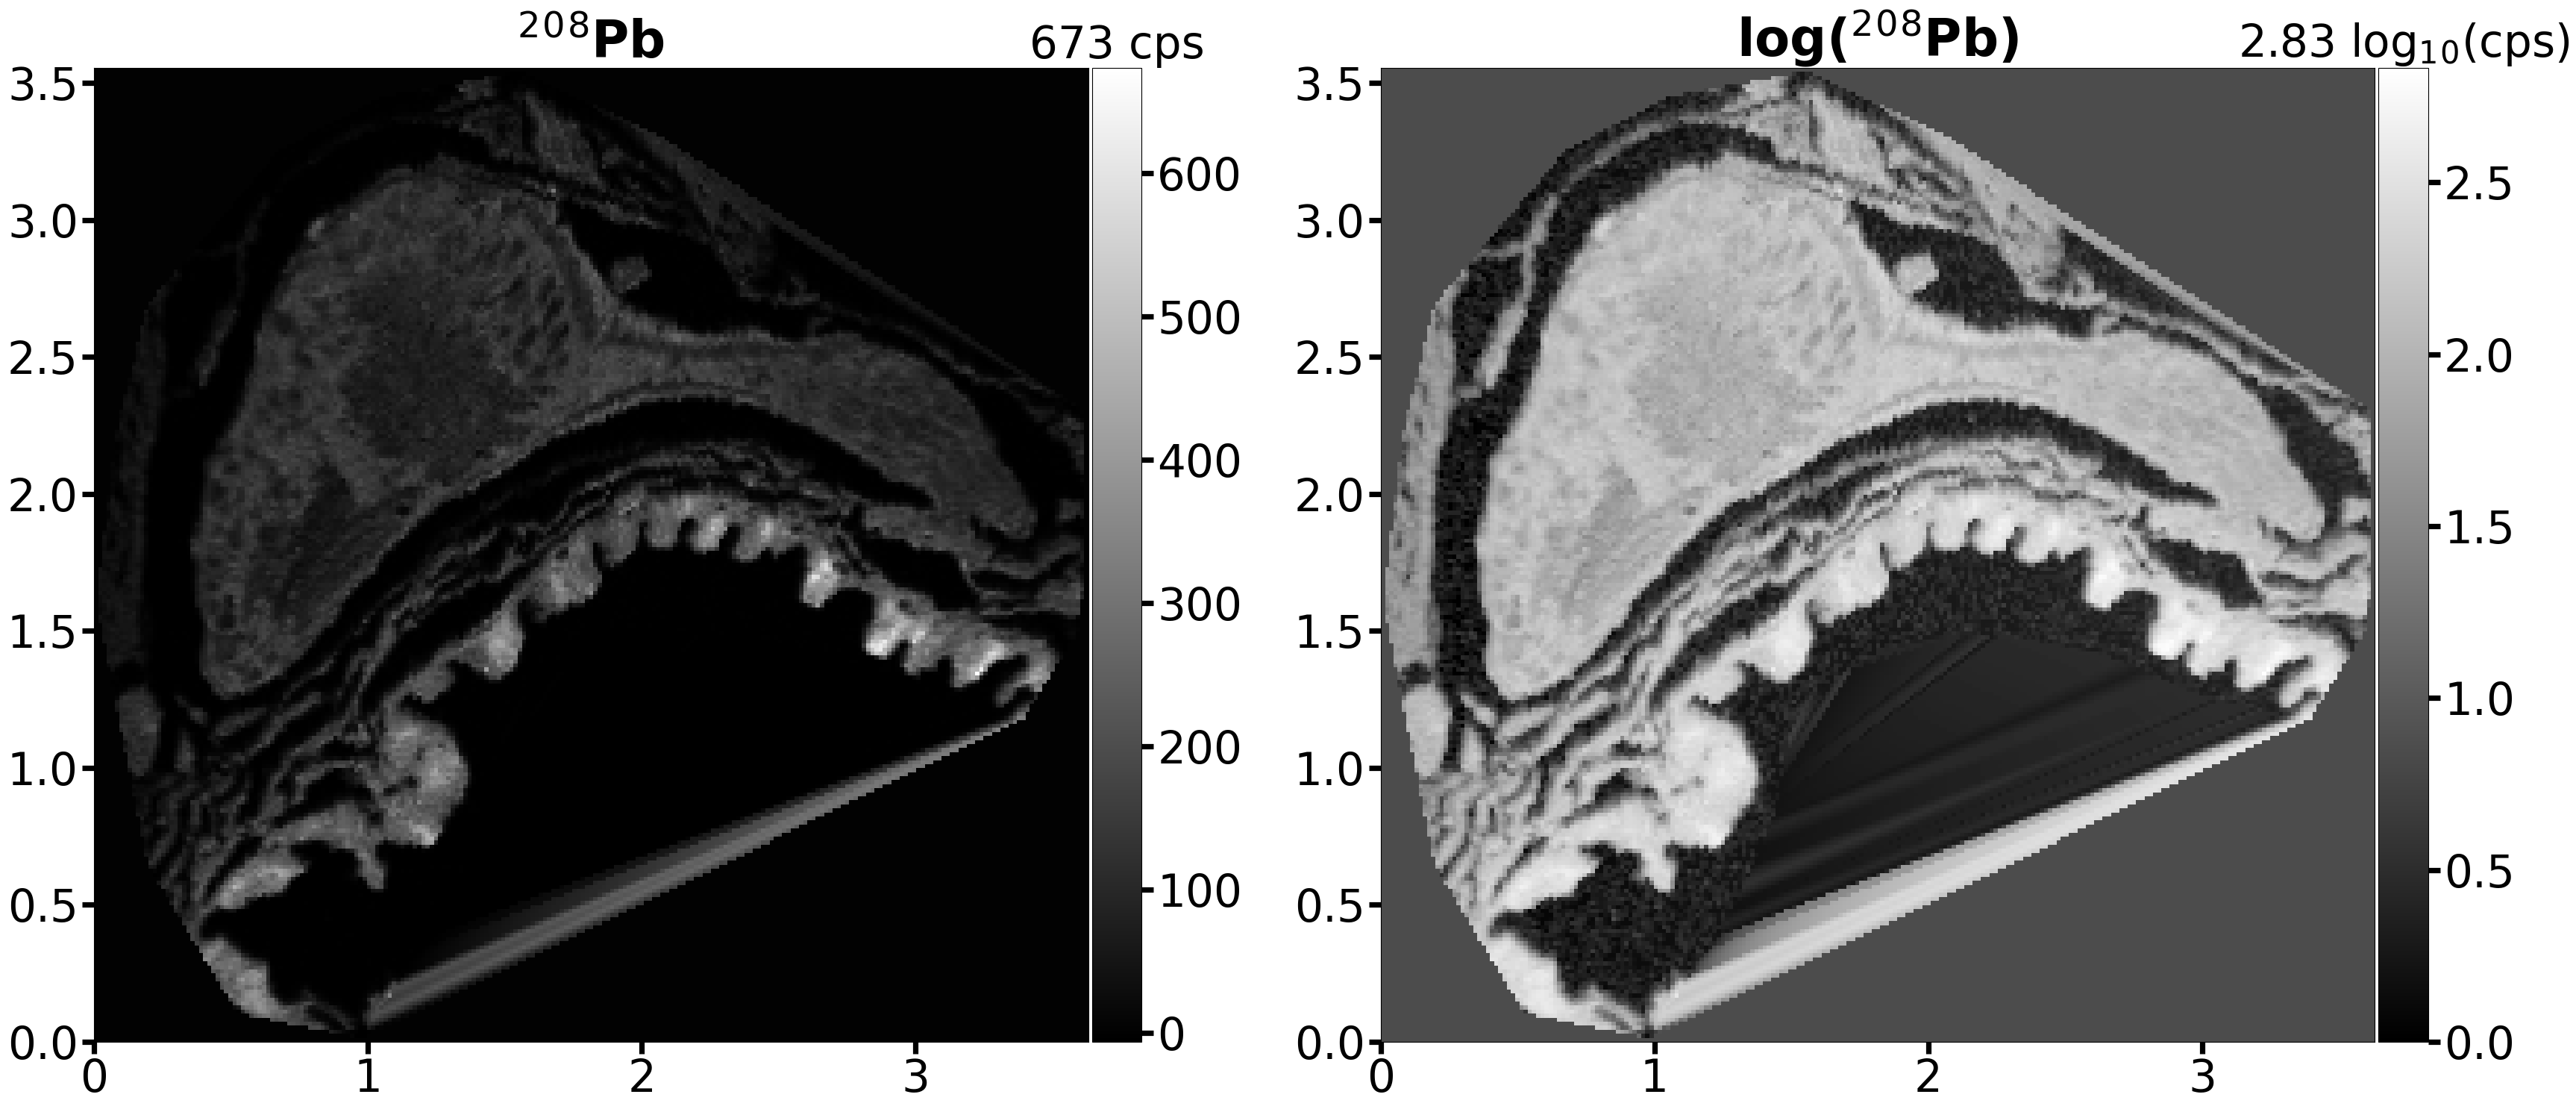

In [481]:
from numpy import inf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator

# Control_Head_Pb, Control_Head_P, Control_Head_Zn, Control_Gut_Pb, Control_Gut_P, Control_Gut_Zn, Mid_Head_Pb, Mid_Head_P, Mid_Head_Zn
# Mid_Gut_Pb, Mid_Gut_P, Mid_Gut_Zn, High_Head_Pb, High_Head_P, High_Head_Zn, High_Gut_Pb, High_Gut_P, High_Gut_Zn, CW_Head_Pb,
# CW_Head_P, CW_Head_Zn, CW_Gut_Pb, CW_Gut_P, CW_Gut_Zn

data = High_Head_4micron_Pb
k_num=1
save_name="./High_Head_4micron_Pb"

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(35,35))

sample = np.rot90(data,k=k_num,)
#sample = np.flip(data.transpose())

im1 = ax1.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", vmax = np.percentile(data,100))

divider3 = make_axes_locatable(ax1)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar2 = plt.colorbar(im1, cax=cax3, format="%.0f", label="")
cbar2.ax.set_title(f"{int(np.percentile(sample,100))} cps", fontsize=43)
cbar2.ax.tick_params(labelsize=43, width=5.2, length=11.7)


# fmt = '%1.0f'
# clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="cps",)
# clb.ax.set_title(int(np.percentile(CW_Gut_Pb,95)), fontsize=10)
ax1.set_title("$^{2}$$^{0}$$^{8}$Pb", fontweight="bold", size=49.5)
ax1.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

sample = data

if sample.min() < 0:
    sample = sample + abs(sample.min())
    sample = sample + 1

sample = np.log10(np.rot90(sample, k=k_num,))

sample[sample == -inf] = 0

im2 = ax2.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", )

divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar3 = plt.colorbar(im2, cax=cax3, format="%.1f", label="",)

cbar3.ax.set_title(f"{sample.max():.2f} log$_{1}$$_{0}$(cps)", fontsize=43,) 
cbar3.ax.tick_params(labelsize=43, width=5.2, length=11.7)

ax2.set_title("log($^{2}$$^{0}$$^{8}$Pb)", fontweight="bold", size=49.5)
ax2.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

#fmt = '%1.0f'
#clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="log$_{10}$(cps)")
fig.tight_layout(pad=5, w_pad=5, h_pad=5.0)
plt.show()
fig.savefig(save_name, bbox_inches ="tight", pad_inches = 1, transparent = True)

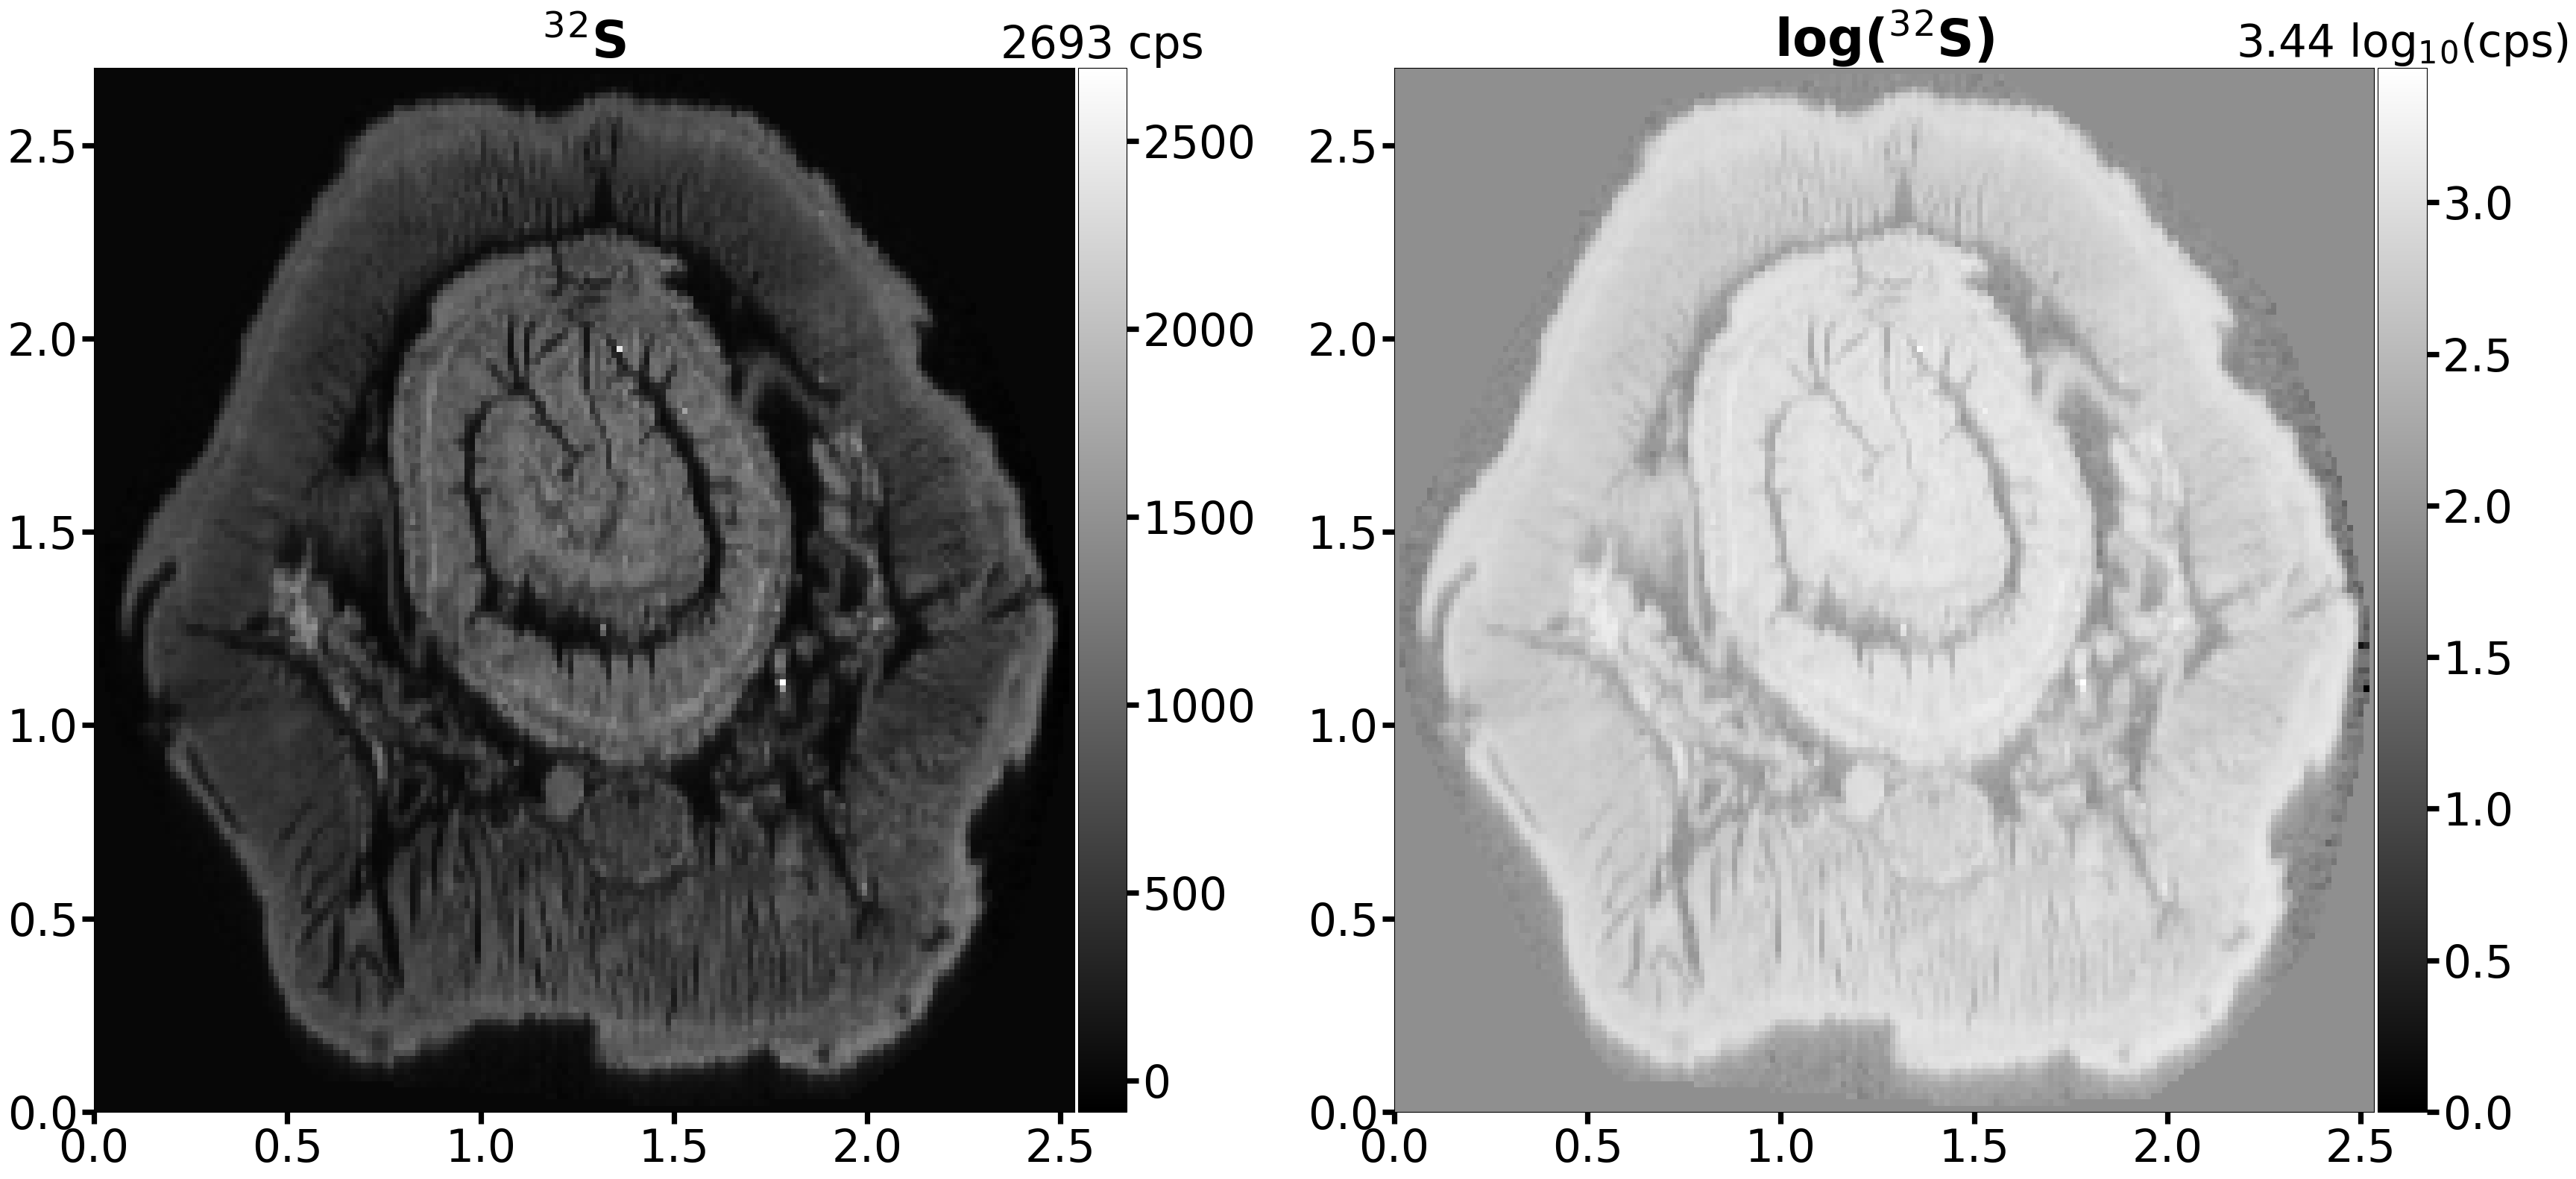

In [472]:
from numpy import inf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator

# Control_Head_Pb, Control_Head_P, Control_Head_Zn, Control_Gut_Pb, Control_Gut_P, Control_Gut_Zn, Mid_Head_Pb, Mid_Head_P, Mid_Head_Zn
# Mid_Gut_Pb, Mid_Gut_P, Mid_Gut_Zn, High_Head_Pb, High_Head_P, High_Head_Zn, High_Gut_Pb, High_Gut_P, High_Gut_Zn, CW_Head_Pb,
# CW_Head_P, CW_Head_Zn, CW_Gut_Pb, CW_Gut_P, CW_Gut_Zn

data = CW_Gut_S
k_num=3
save_name="./CW_Gut_S"

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(35,35))

sample = np.rot90(data,k=k_num,)
#sample = np.flip(data.transpose())

im1 = ax1.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", vmax = np.percentile(data,100))

divider3 = make_axes_locatable(ax1)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar2 = plt.colorbar(im1, cax=cax3, format="%.0f", label="")
cbar2.ax.set_title(f"{int(np.percentile(sample,100))} cps", fontsize=43)
cbar2.ax.tick_params(labelsize=43, width=5.2, length=11.7)


# fmt = '%1.0f'
# clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="cps",)
# clb.ax.set_title(int(np.percentile(CW_Gut_Pb,95)), fontsize=10)
ax1.set_title("$^{3}$$^{2}$S", fontweight="bold", size=49.5)
ax1.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

sample = data

if sample.min() < 0:
    sample = sample + abs(sample.min())
    sample = sample + 1

sample = np.log10(np.rot90(sample, k=k_num,))

sample[sample == -inf] = 0

im2 = ax2.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", )

divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar3 = plt.colorbar(im2, cax=cax3, format="%.1f", label="",)

cbar3.ax.set_title(f"{sample.max():.2f} log$_{1}$$_{0}$(cps)", fontsize=43,) 
cbar3.ax.tick_params(labelsize=43, width=5.2, length=11.7)

ax2.set_title("log($^{3}$$^{2}$S)", fontweight="bold", size=49.5)
ax2.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

#fmt = '%1.0f'
#clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="log$_{10}$(cps)")
fig.tight_layout(pad=5, w_pad=5, h_pad=5.0)
plt.show()
fig.savefig(save_name, bbox_inches ="tight", pad_inches = 1, transparent = True)

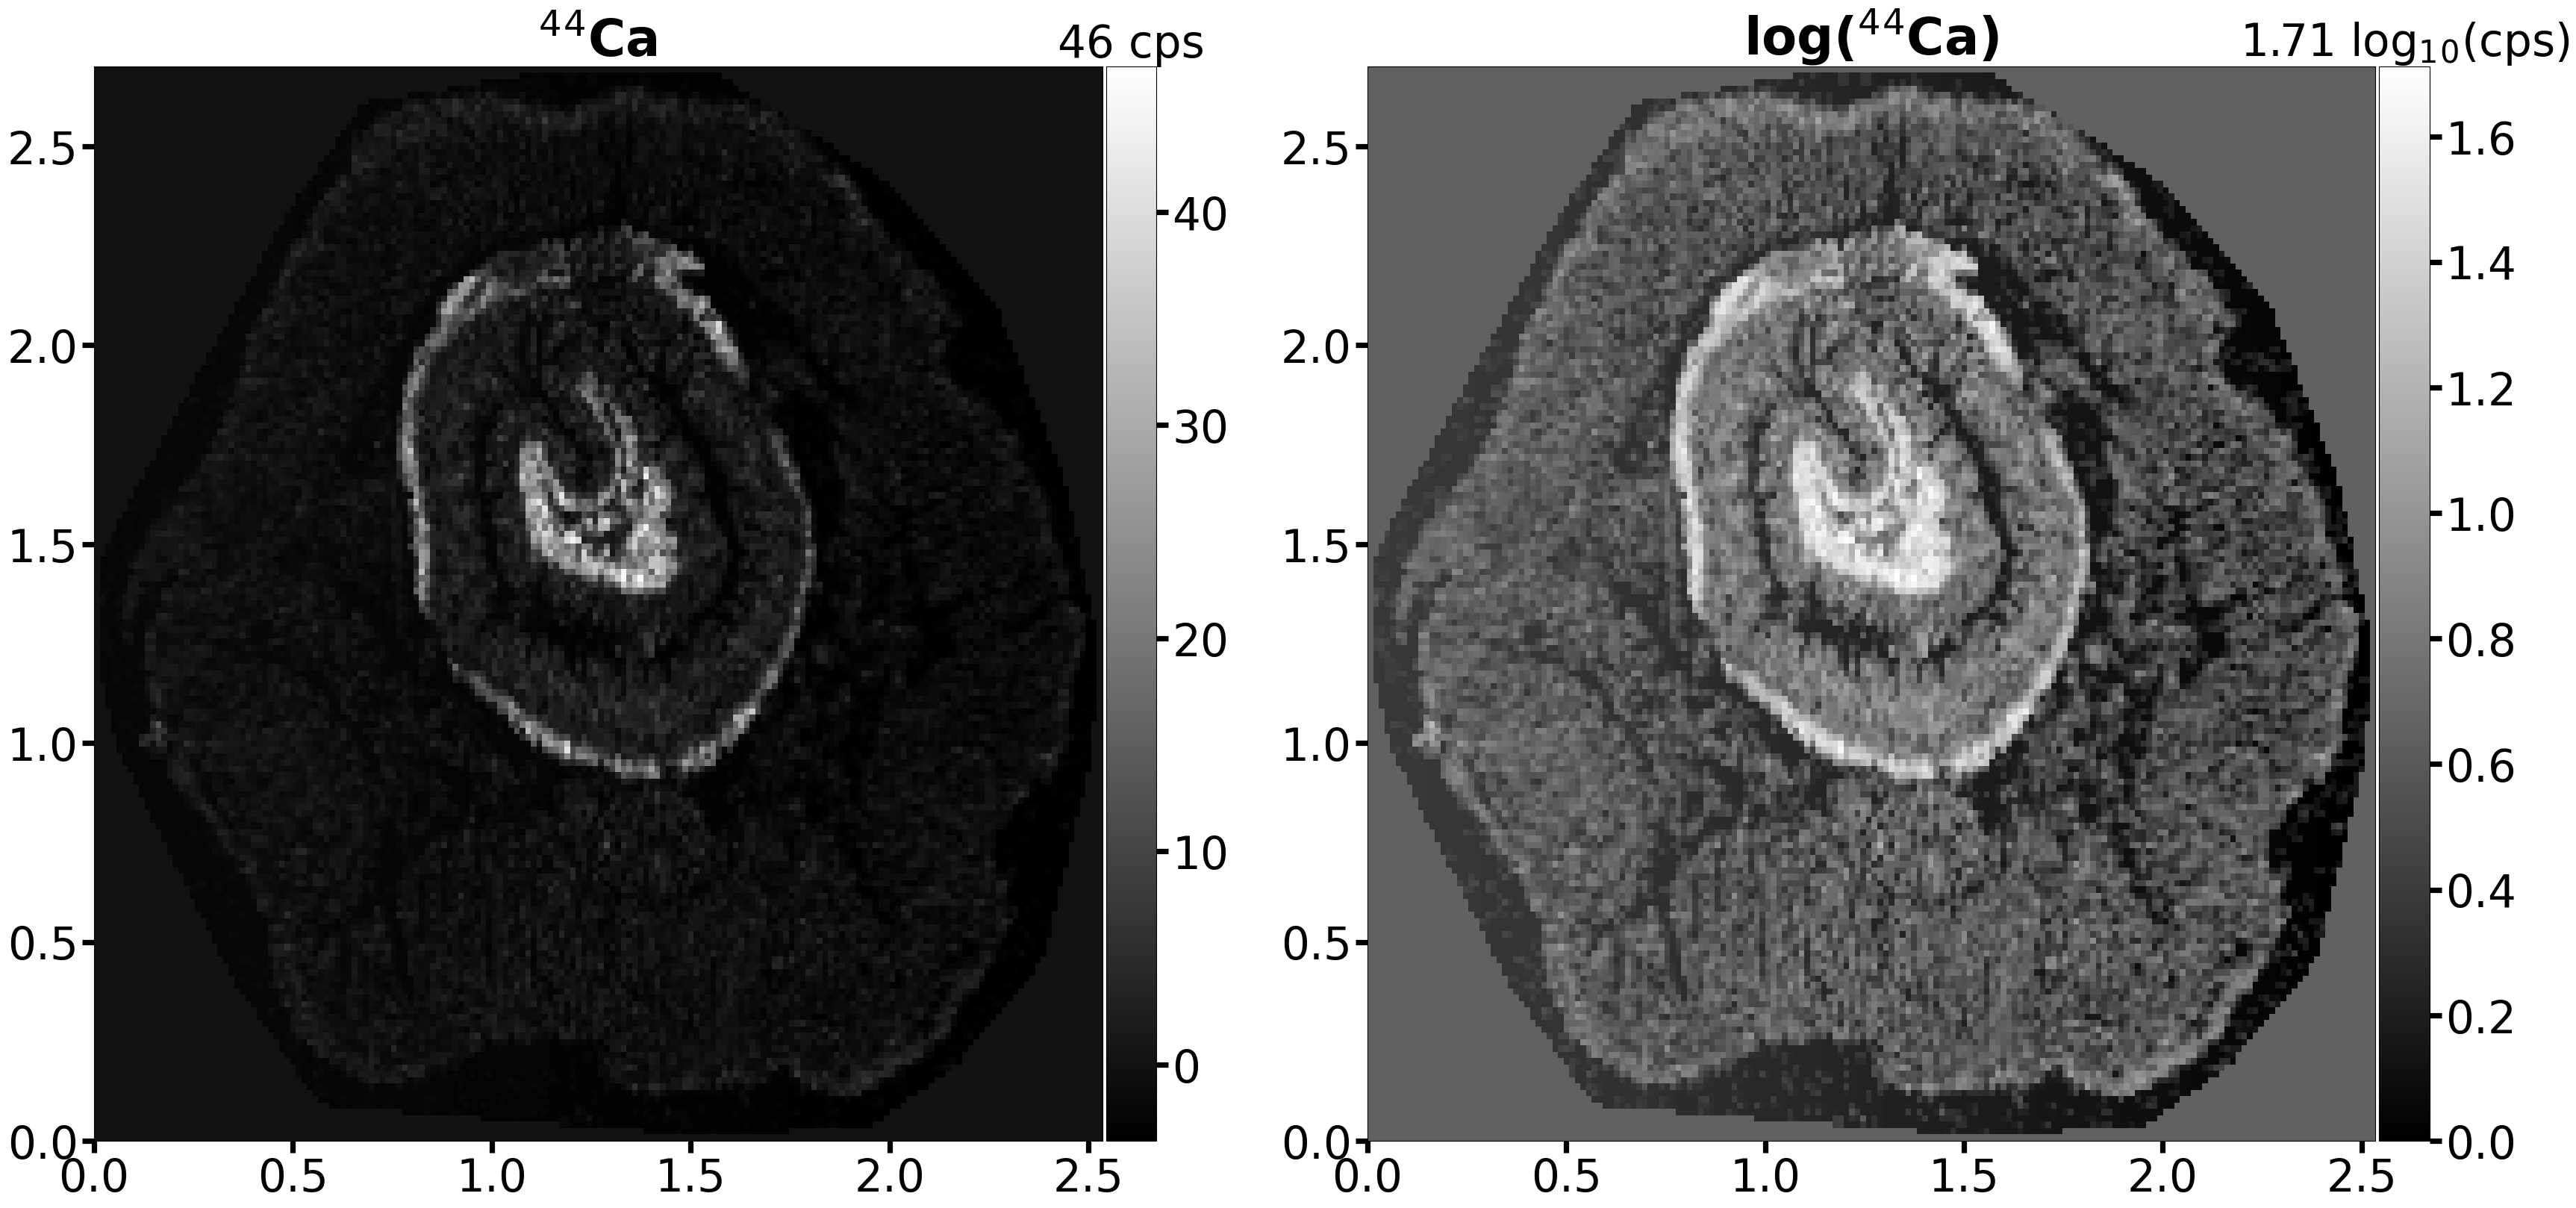

In [473]:
from numpy import inf
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator

# Control_Head_Pb, Control_Head_P, Control_Head_Zn, Control_Gut_Pb, Control_Gut_P, Control_Gut_Zn, Mid_Head_Pb, Mid_Head_P, Mid_Head_Zn
# Mid_Gut_Pb, Mid_Gut_P, Mid_Gut_Zn, High_Head_Pb, High_Head_P, High_Head_Zn, High_Gut_Pb, High_Gut_P, High_Gut_Zn, CW_Head_Pb,
# CW_Head_P, CW_Head_Zn, CW_Gut_Pb, CW_Gut_P, CW_Gut_Zn

data = CW_Gut_Ca
k_num=3
save_name="./CW_Gut_Ca"

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(35,35))

sample = np.rot90(data,k=k_num,)
#sample = np.flip(data.transpose())

im1 = ax1.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", vmax = np.percentile(data,100))

divider3 = make_axes_locatable(ax1)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar2 = plt.colorbar(im1, cax=cax3, format="%.0f", label="")
cbar2.ax.set_title(f"{int(np.percentile(sample,100))} cps", fontsize=43)
cbar2.ax.tick_params(labelsize=43, width=5.2, length=11.7)


# fmt = '%1.0f'
# clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="cps",)
# clb.ax.set_title(int(np.percentile(CW_Gut_Pb,95)), fontsize=10)
ax1.set_title("$^{4}$$^{4}$Ca", fontweight="bold", size=49.5)
ax1.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

sample = data

if sample.min() < 0:
    sample = sample + abs(sample.min())
    sample = sample + 1

sample = np.log10(np.rot90(sample, k=k_num,))

sample[sample == -inf] = 0

im2 = ax2.imshow(sample, cmap='binary_r', extent = (0, sample.shape[0]*15/1000, 0, sample.shape[1]*15/1000), interpolation = "none", )

divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
cbar3 = plt.colorbar(im2, cax=cax3, format="%.1f", label="",)

cbar3.ax.set_title(f"{sample.max():.2f} log$_{1}$$_{0}$(cps)", fontsize=43,) 
cbar3.ax.tick_params(labelsize=43, width=5.2, length=11.7)

ax2.set_title("log($^{4}$$^{4}$Ca)", fontweight="bold", size=49.5)
ax2.tick_params(axis='both', labelsize=43, length=11.7, width=5.2)

#fmt = '%1.0f'
#clb = plt.colorbar(fraction=0.05, pad=0.01, format = fmt, label="log$_{10}$(cps)")
fig.tight_layout(pad=5, w_pad=5, h_pad=5.0)
plt.show()
fig.savefig(save_name, bbox_inches ="tight", pad_inches = 1, transparent = True)